# PRE-PROCESSING + PIPELINE (partie 1)

URL : https://youtu.be/OGWwzm304Xs?si=bx2yG_Azbpkz3gTO

In [3]:
#importations
import numpy as np
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,LabelBinarizer,OneHotEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

## Transformeurs

In [5]:
#définir X
X = np.array(['Chat',
             'Chien',
             'Chat',
             'Oiseau'])

Pour transformer les données de façon cohérente, les transformers disposent de 2 méthodes:
- la méthode **fit()** permet de **développer une fonction de transformation** en analysant les données du train set.
- la méthode **transform()** permet d'**appliquer cette fonction de transformation** sur toutes les données qu'on lui fournit (les données du train set, du test set ou mêmes les données futures).

In [7]:
#définir le transformeur, ici LabelEncoder()
transformer = LabelEncoder()

#la méthode fit() permet de développer une fonction de transformation en analysant les données du train set (ici X)
transformer.fit(X)

LabelEncoder()

In [8]:
#la méthode transform() permet d'appliquer cette fonction de transformation sur toutes les données qu'on lui fournit
transformer.transform(X)

array([0, 1, 0, 2])

In [9]:
#les données X sont transformées de valeurs non numériques en valeurs numériques:
#0 pour Chat
#1 pour Chien
#2 pour Oiseau

Pour faire d'une pierre 2 coups, il existe une 3ème méthode, appelée **fit_transform()** qui **combine la méthode fit() avec la méthode transform().**

In [11]:
#définir le transformeur, ici LabelEncoder()
transformer = LabelEncoder()

#la méthode fit_transform() qui combine la méthode fit() avec la méthode transform()
transformer.fit_transform(X)

array([0, 1, 0, 2], dtype=int64)

In [12]:
#on a le même résultat!

### Transformeur et estimateur

**Explication:**

Dans la pratique, quand on désire développer un modèle de ML:

1. on divise le dataset en 2 parties: train set (X_train, y_train) et test set(X_test, y_test).
2. Avec les données du train set (X_train, y_train), on développe une fonction de transformation, ce qui permet de traiter les données pour ensuite entraîner un estimateur.
3. Après, on peut utiliser le transformeur et l'estimateur tels qu'ils ont été développés, pour transformer les données du test set (X_test, y_test) puis faire de nouvelles prédictions (y_pred).

- **En combinant un transformeur avec un estimateur on obtient une pipeline (càd une chaîne de tranformation).**

**X_test ----> Pipeline (= transformeur + estimateur) ----> y_pred**

## Preprocessing: encodage

### Encodage ordinal

**Défnition:**

L'encodage signifie transformer les données non numériques en données numériques (pour le développement d'un modèle de ML).

Dans sklearn, il existe 5 transformeurs d'encodage:

- LabelEncoder
- LabelBinarizer
- MultiLabelBinarizer
- OrdinalEncoder
- OneHotEncoder

Ces transformeurs permettent de faire **2 types d'encodages: l'encodage ordinal et l'encodage OneHot**.

- **l'encodage ordinal:**


Consiste à associer chaque catégorie (ou classe) d'une variable à une variable décimale unique (exp: 0 pour Chat, 1 pour Chien, 2 pour Oiseau,...etc). Pour ça, on **LabelEncoder et OrdinalEncoder**.

  **LabelEncoder** est conçu spécialement pour **encoder la variable y (label/target)**. En prinicipe, il ne traîte qu'une seule colonne.


In [18]:
#définir y
y = np.array(['Chat','Chien','Chat','Oiseau'])

#définir le transformeur, ici LabelEncoder()
encoder = LabelEncoder()

#la méthode fit() permet de développer une fonction de transformation en analysant les données (ici y)
encoder.fit(y)

LabelEncoder()

In [19]:
#classes_: contient l'étiquette de chaque classe
encoder.classes_

array(['Chat', 'Chien', 'Oiseau'], dtype='<U6')

In [20]:
#la méthode transform() permet d'appliquer cette fonction de transformation sur toutes les données qu'on lui fournit
encoder.transform(y)

array([0, 1, 0, 2])

In [21]:
#0 pour Chat
#1 pour Chien
#2 pour Oiseau

In [22]:
#on peut aussi utiliser la méthode fit_transform() comme tout à l'heure
#la méthode fit_transform() combine la méthode fit() avec la méthode transform()
encoder.fit_transform(y)

array([0, 1, 0, 2], dtype=int64)

In [23]:
#on obtient le même résultat!

- Pour certains transformeurs, dont LabelEncoder, il existe une méthode appelée **inverse_tansform() qui permet d'appliquer la transformation dans le sens contraire**, donc elle permet de décoder les données.

**Exp:** si on a développé un modèle de ML à identifier des animaux, et que ce modèle donne des valeurs numériques, si on ne sait pas ce que signifient ces valeurs numériques alors on peut utiliser la méthode inverse_tansform() pour décoder les données.

In [25]:
#on fait passer un tableau numpy np.array([0, 0, 2, 2]) à la méthode inverse_tansform()
encoder.inverse_transform(np.array([0, 0, 2, 2]))

array(['Chat', 'Chat', 'Oiseau', 'Oiseau'], dtype='<U6')

**Si on désire encoder un tableau qui contient plusieurs variables, LabelEncoder ne va pas fonctionner.**

Démonstration:

In [27]:
#définir X
X = np.array([['Chat', 'Poils'],
             ['Chien', 'Poils'],
             ['Chat', 'Poils'],
             ['Oiseau', 'Plumes']])

#définir le transformeur, ici LabelEncoder()
encoder = LabelEncoder()

#la méthode fit() permet de développer une fonction de transformation en analysant les données (ici X)
encoder.fit(X)

#la méthode fit_transform() qui combine la méthode fit() avec la méthode transform()
encoder.fit_transform(X)

ValueError: y should be a 1d array, got an array of shape (4, 2) instead.

Il faut dans ce cas utiliser **OrdinalEncoder**. En fait, il fait la même chose que LabelEncoder sauf qu'il est utilisé **pour traîter les données X, càd plusieurs variables à la fois**.

In [48]:
#on remplace LabelEncoder par OrdinalEncoder:

#définir X
X = np.array([['Chat', 'Poils'],
             ['Chien', 'Poils'],
             ['Chat', 'Poils'],
             ['Oiseau', 'Plumes']])

#définir le transformeur, ici OrdinalEncoder()
encoder = OrdinalEncoder()

#la méthode fit() permet de développer une fonction de transformation en analysant les données (ici X)
encoder.fit(X)

#la méthode fit_transform() qui combine la méthode fit() avec la méthode transform()
encoder.fit_transform(X)

array([[0., 1.],
       [1., 1.],
       [0., 1.],
       [2., 0.]])

L'inconvéniant avec cette technique d'encodage, c'est que d'un point de vue arithmétique, ça revient à dire que:

Chat < Chien < Oiseau

(0 < 1 < 2)

Mais cela n'a aucun sens, car ces catégories ne sont pas ordinales. Celà risque de pénaliser les modèles de ML, à l'exception des modèles qui sont basés sur les arbres de décision car ceux là ne sont pas sensibles aux relations d'ordre dans les données qu'on leur présente.

Pour éviter ça, il existe un autre type d'encodage: **l'encodage OneHot**.

### OneHot encoding

Avec cette technique, chaque catégorie (ou classe) est représentée de façon binaire dans une colonne qui lui est propre, on décompose ainsi la variable initiale en plusieurs sous-variables créant donc autant de colonnes que l'on a de catégories (ou de classes) dans cette variable. De cette manière, les algorithmes de ML ne peuvent plus comparer les valeurs, Chat Chien et Oiseau, sur un seul est même axe, car ces catégories sont désormais séparées en plusieurs dimensions.

Alors pour faire ça dans sklearn, on dispose de 3 transformeurs:
- LabelBinarizer()
- MultiLabelBinarizer()
- OneHotEncoder() 

**Démonstration:**

In [52]:
#définir y
y = np.array(['Chat','Chien','Chat','Oiseau'])

#définir le transformeur, ici LabelBinarizer()
encoder = LabelBinarizer()

#la méthode fit_transform() qui combine la méthode fit() avec la méthode transform()
encoder.fit_transform(y)

array([[1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1]])

In [53]:
#[1, 0, 0] pour Chat
#[0, 1, 0] pour Chien
#[0, 0, 1] pour Oiseau

Beaucoup de gens pensent que l'encodage OneHot présente lui aussi un inconvénient, en effet dans le cas où on a un très grand nombre de catégories, par exemple plusieurs centaines de villes dans un dataset d'immobilier, alors le résultat de l'encodage OneHot va nous donner un tableau extrêmement large et difficile à manipuler, mais en réalité ce n'est pas vraiment un problème, parce que ce tableau, bien qu'il soit très large ne va pas peser très lourd sur la mémoire de l'ordinateur, la raison à cela est qu'on est ici en présence d'une matrice creuse (sparse matrix) c'est à dire une matrice qui est remplie en grande majorité de nombres 0, celle-ci peut donc être présentée dans un format très léger dans lequel le chiffre 0 n'est tout simplement pas stocké dans la mémoire de l'ordinateur (puisqu'il ne sert à rien).

### Matrice creuse (sparse matrix)

In [56]:
#définir y
y = np.array(['Chat','Chien','Chat','Oiseau'])

#définir le transformeur, ici LabelBinarizer()
#True signifie que le tableau renvoyé par la transformation doit être au format CSR (Compressed Sparse Row)
encoder = LabelBinarizer(sparse_output=True)

#la méthode fit_transform() qui combine la méthode fit() avec la méthode transform()
encoder.fit_transform(y)

<Compressed Sparse Row sparse matrix of dtype 'int32'
	with 4 stored elements and shape (4, 3)>

- Pour le transformer OneHotEncoder, c'est même le choix par défaut (Compressed Sparse Row), puisqu'en principe si on effectue une opération d'encodage OneHot sur toutes les variable X, on va se retrouver avec un tableau très large, donc sklearn de base décide de compresser ce résultat avec un format CSR. On peut le voir ici:

In [58]:
#définir X
X = np.array([['Chat', 'Poils'],
             ['Chien', 'Poils'],
             ['Chat', 'Poils'],
             ['Oiseau', 'Plumes']])

#définir le transformeur, ici OrdinalEncoder()
encoder = OneHotEncoder()

#la méthode fit_transform() qui combine la méthode fit() avec la méthode transform()
encoder.fit_transform(X)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 8 stored elements and shape (4, 5)>

**En résumé:**

**Encodage ordinal:**
- **y: LabelEncoder()**
- **X: OrdinalEncoder()**

**Encodage One-Hot:**
- **y: LabelBinarizer(), MultiLabelBinarizer()**
- **X: OneHotEncoder()**

## Preprocessing: normalisation

en DA il est indispensable de normaliser les données quantitatives, c'est à dire les mettre tout sur une même échelle, cela facilite considérablement l'apprentissage des modèles de ML qui sont basés sur la descente de gradient, les calculs de distance ou les calculs de variance, par exemple dans le cas d'une descente de gradient lorsqu'une variable prend le dessus sur une autre alors il devient plus difficile pour la fonction coût de converger vers son minimum c'est pourquoi il est très important de normaliser nos données avant leur passage dans la machine, pour ça, il existe beaucoup de techniques de normalisation, et on va voir les 3 plus connues, à savoir **la normalisation minimax, la standardisation (StandardScaler) ainsi que le transformer RobustScaler** de sklearn.

### Normalisation MinMax

Consiste à transformer chaque variable X de telle sorte à ce que les valeurs soient toutes comprises **entre 0 et 1**.

In [64]:
#définir X (exp. de surfaces d'appartements)
X = np.array([[70],
             [80],
             [120]])

#définir le scaler, ici MinMaxScaler()
scaler = MinMaxScaler()

#la méthode fit_transform() qui combine la méthode fit() avec la méthode transform()
scaler.fit_transform(X)

array([[0. ],
       [0.2],
       [1. ]])

Même si on déforme ainsi nos données, on ne perd aucune information, car les normalisations ont conservé les rapports de distance qu'il y avait dans nos données, c'est à dire que l'écart qu'il y a entre 0 et 0,2 et complètement équivalent à l'écart qu'il ya entre 70 et 80 pour la machine ça ne change absolument rien.

In [66]:
#charger le jeu de données Iris et l'enregistrer dans une variable appelée iris
iris = load_iris()

#extraire les caractéristiques (features) du dataset
#et les enregister dans la variable X
X = iris.data

#afficher la forme du tableau des caractéristiques  
X.shape

(150, 4)

In [67]:
#extraire les cibles (labels/target) du dataset (ici ce sont les espèces de la fleur d'Iris)
y = iris.target

#afficher la forme du tableau de la target  
y.shape

(150,)

Text(0.5, 1.0, 'Nuage de points des longueurs et largeurs du pétale')

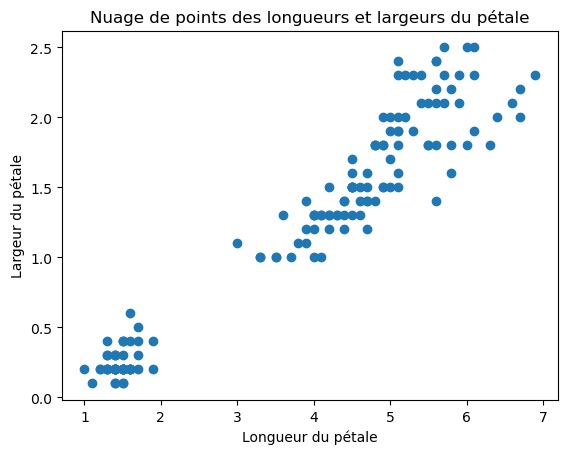

In [68]:
#créer un nuage de points avec la longueur et la largeur des pétales  
#X[:, 2] correspond à la 3ème caractéristique (longueur des pétales)  
#X[:, 3] correspond à la 4ème caractéristique (largeur des pétales)
plt.scatter(X[:, 2], X[:, 3])
plt.xlabel('Longueur du pétale')  #axe des x
plt.ylabel('Largeur du pétale')   #axe des y
plt.title('Nuage de points des longueurs et largeurs du pétale')  #titre du graphique

Si on veut normaliser les données:

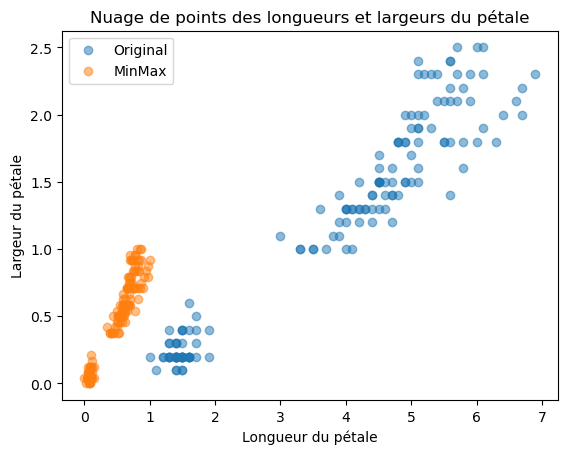

In [70]:
#entraîner MinMaxScaler() sur les données X avec fit_transform()
X_minmax = MinMaxScaler().fit_transform(X)

#créer un nuage de points avec la longueur et la largeur des pétales  

#X[:, 2] correspond à la 3ème caractéristique (longueur des pétales)  
#X[:, 3] correspond à la 4ème caractéristique (largeur des pétales)
#alpha=0.5 définit l'opacité des points (plus plus c'est opaque, plus il y a de points les uns sur les autres)
plt.scatter(X[:, 2], X[:, 3], label= 'Original', alpha=0.5)

#X_minmax[:, 2] correspond à X[:, 2] avec les valeurs de X normalisées
#X_minmax[:, 3] correspond à X[:, 3] avec les valeurs de X normalisées
#alpha=0.5 définit l'opacité des points (plus plus c'est opaque, plus il y a de points les uns sur les autres)
plt.scatter(X_minmax[:, 2], X_minmax[:, 3], label= 'MinMax', alpha=0.5)


plt.xlabel('Longueur du pétale')  #axe des x
plt.ylabel('Largeur du pétale')   #axe des y
plt.title('Nuage de points des longueurs et largeurs du pétale')  #titre du graphique
plt.legend()     #ajouter une légende

In [71]:
#on voit que les valeurs de x (Longueur du pétale) et y (Largeur du pétale) sont toutes entre 0 et 1

### Standardisation

Elle standardise chaque variable X: **la moyenne est nulle, et l'écart-type est égal à 1**.

On obtient alors des données simples à utiliser pour la plupart des modèles statistiques comme les supports de vector machine.

In [74]:
#définir X (exp. de surfaces d'appartements)
X = np.array([[70],
             [80],
             [120]])

#définir le scaler, ici StandardScaler()
scaler = StandardScaler()

#la méthode fit_transform() qui combine la méthode fit() avec la méthode transform()
scaler.fit_transform(X)

array([[-0.9258201 ],
       [-0.46291005],
       [ 1.38873015]])

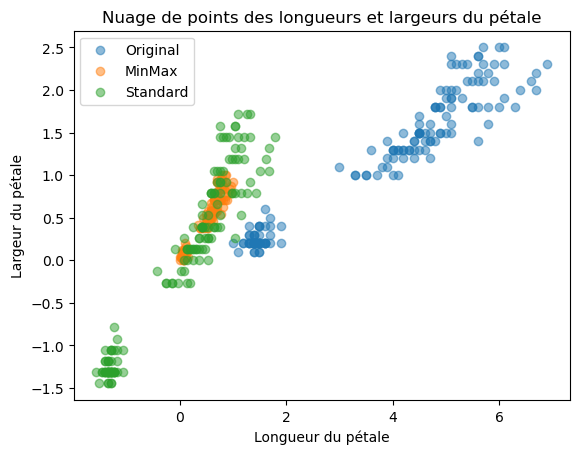

In [75]:
#charger le jeu de données Iris et l'enregistrer dans une variable appelée iris
iris = load_iris()

#extraire les caractéristiques (features) du dataset
#et les enregister dans la variable X
X = iris.data

#entraîner MinMaxScaler() sur les données X avec fit_transform()
X_minmax = MinMaxScaler().fit_transform(X)

#entraîner StandardScaler() sur les données X avec fit_transform()
X_stdscl = StandardScaler().fit_transform(X)

#créer un nuage de points avec la longueur et la largeur des pétales  

#X[:, 2] correspond à la 3ème caractéristique (longueur des pétales)  
#X[:, 3] correspond à la 4ème caractéristique (largeur des pétales)
#alpha=0.5 définit l'opacité des points (plus plus c'est opaque, plus il y a de points les uns sur les autres)
plt.scatter(X[:, 2], X[:, 3], label= 'Original', alpha=0.5)

#X_minmax[:, 2] correspond à X[:, 2] avec les valeurs de X normalisées
#X_minmax[:, 3] correspond à X[:, 3] avec les valeurs de X normalisées
#alpha=0.5 définit l'opacité des points (plus plus c'est opaque, plus il y a de points les uns sur les autres)
plt.scatter(X_minmax[:, 2], X_minmax[:, 3], label= 'MinMax', alpha=0.5)

#X_stdscl[:, 2] correspond à X[:, 2] avec les valeurs de X standardisées
#X_stdscl[:, 3] correspond à X[:, 3] avec les valeurs de X standardisées
#alpha=0.5 définit l'opacité des points (plus plus c'est opaque, plus il y a de points les uns sur les autres)
plt.scatter(X_stdscl[:, 2], X_stdscl[:, 3], label= 'Standard', alpha=0.5)

plt.xlabel('Longueur du pétale')  #axe des x
plt.ylabel('Largeur du pétale')   #axe des y
plt.title('Nuage de points des longueurs et largeurs du pétale')  #titre du graphique
plt.legend()     #ajouter une légende

In [76]:
#on voit que les données dans Standard ne sont pas ecrasées comme MinMax
#la moyenne des données (x et y) est égale à 0
#l'écart type pour chaque variable est égal à 1

Ces deux techniques sont utilisées très souvent en ML, néanmoins elles ont un gros inconvénient: **elles sont sensibles aux valeurs aberrantes (les outliers)**.

**Démonstration:**

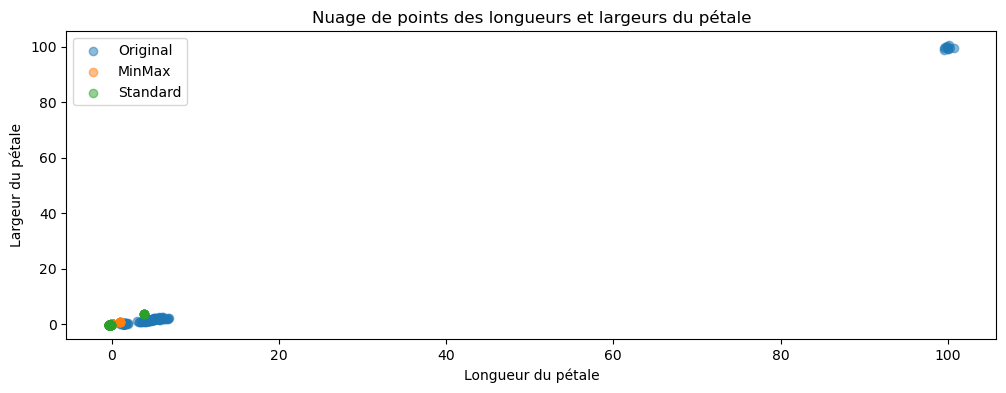

In [78]:
#charger le jeu de données Iris et l'enregistrer dans une variable appelée iris
iris = load_iris()

#extraire les caractéristiques (features) du dataset
#et les enregister dans la variable X
X = iris.data

#créer un tableau d'outliers (valeurs aberrantes)  
#ici, on crée un tableau de forme (10, 4) rempli de 100  
#et on ajoute des valeurs aléatoires provenant d'une distribution normale  
outliers = np.full((10, 4), 100) + np.random.randn(10, 4) 

#combiner les données d'origine avec les outliers et les enregistrer dans la variable X
X = np.vstack((X, outliers))

#entraîner MinMaxScaler() sur les données X avec fit_transform()
X_minmax = MinMaxScaler().fit_transform(X)

#entraîner StandardScaler() sur les données X avec fit_transform()
X_stdscl = StandardScaler().fit_transform(X)

#créer un nuage de points avec la longueur et la largeur des pétales  

#créer une figure avec des dimensions personalisées
plt.figure(figsize= (12, 4))

#X[:, 2] correspond à la 3ème caractéristique (longueur des pétales)  
#X[:, 3] correspond à la 4ème caractéristique (largeur des pétales)
#alpha=0.5 définit l'opacité des points (plus plus c'est opaque, plus il y a de points les uns sur les autres)
plt.scatter(X[:, 2], X[:, 3], label= 'Original', alpha=0.5)

#X_minmax[:, 2] correspond à X[:, 2] avec les valeurs de X normalisées
#X_minmax[:, 3] correspond à X[:, 3] avec les valeurs de X normalisées
#alpha=0.5 définit l'opacité des points (plus plus c'est opaque, plus il y a de points les uns sur les autres)
plt.scatter(X_minmax[:, 2], X_minmax[:, 3], label= 'MinMax', alpha=0.5)

#X_stdscl[:, 2] correspond à X[:, 2] avec les valeurs de X standardisées
#X_stdscl[:, 3] correspond à X[:, 3] avec les valeurs de X standardisées
#alpha=0.5 définit l'opacité des points (plus plus c'est opaque, plus il y a de points les uns sur les autres)
plt.scatter(X_stdscl[:, 2], X_stdscl[:, 3], label= 'Standard', alpha=0.5)

plt.xlabel('Longueur du pétale')  #axe des x
plt.ylabel('Largeur du pétale')   #axe des y
plt.title('Nuage de points des longueurs et largeurs du pétale')  #titre du graphique
plt.legend()     #ajouter une légende

In [79]:
#les outliers rendent difficile la visualisation et l'exploitation des données

Dans ce cas, on fait appel à un transformer très peu sensible aux outliers: le **RobustScaler**.

### RobustScaler

On reprend le même exemple que tout à l'heure, utilisant des données avec des valeurs aberrantes (des outliers).

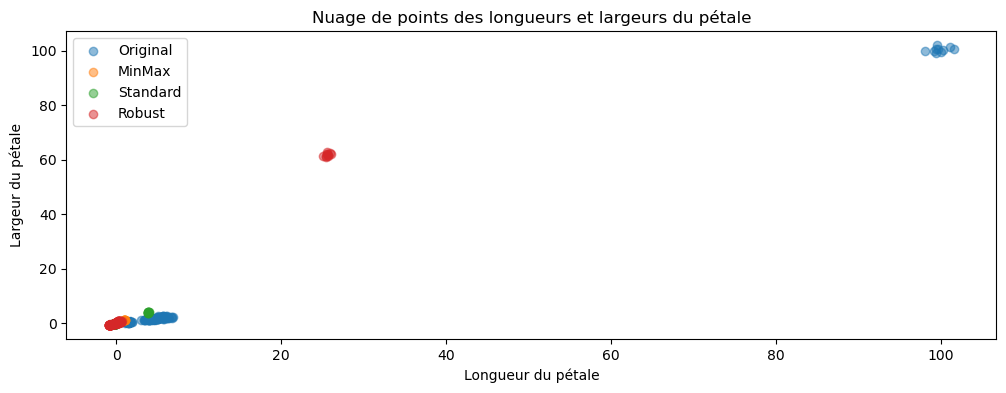

In [83]:
#charger le jeu de données Iris et l'enregistrer dans une variable appelée iris
iris = load_iris()

#extraire les caractéristiques (features) du dataset
#et les enregister dans la variable X
X = iris.data

#créer un tableau d'outliers (valeurs aberrantes)  
#ici, on crée un tableau de forme (10, 4) rempli de 100  
#et on ajoute des valeurs aléatoires provenant d'une distribution normale  
outliers = np.full((10, 4), 100) + np.random.randn(10, 4) 

#combiner les données d'origine avec les outliers et les enregistrer dans la variable X
X = np.vstack((X, outliers))

#entraîner MinMaxScaler() sur les données X avec fit_transform()
X_minmax = MinMaxScaler().fit_transform(X)

#entraîner StandardScaler() sur les données X avec fit_transform()
X_stdscl = StandardScaler().fit_transform(X)

#entraîner RobustScaler() sur les données X avec fit_transform()
X_robust = RobustScaler().fit_transform(X)

#créer un nuage de points avec la longueur et la largeur des pétales  

#créer une figure avec des dimensions personalisées
plt.figure(figsize= (12, 4))

#X[:, 2] correspond à la 3ème caractéristique (longueur des pétales)  
#X[:, 3] correspond à la 4ème caractéristique (largeur des pétales)
#alpha=0.5 définit l'opacité des points (plus plus c'est opaque, plus il y a de points les uns sur les autres)
plt.scatter(X[:, 2], X[:, 3], label= 'Original', alpha=0.5)

#X_minmax[:, 2] correspond à X[:, 2] avec les valeurs de X normalisées
#X_minmax[:, 3] correspond à X[:, 3] avec les valeurs de X normalisées
#alpha=0.5 définit l'opacité des points (plus plus c'est opaque, plus il y a de points les uns sur les autres)
plt.scatter(X_minmax[:, 2], X_minmax[:, 3], label= 'MinMax', alpha=0.5)

#X_stdscl[:, 2] correspond à X[:, 2] avec les valeurs de X standardisées
#X_stdscl[:, 3] correspond à X[:, 3] avec les valeurs de X standardisées
#alpha=0.5 définit l'opacité des points (plus plus c'est opaque, plus il y a de points les uns sur les autres)
plt.scatter(X_stdscl[:, 2], X_stdscl[:, 3], label= 'Standard', alpha=0.5)

#X_robust[:, 2] correspond à X[:, 2] avec les valeurs de X_robust
#X_robust[:, 3] correspond à X[:, 3] avec les valeurs de X_robust
#alpha=0.5 définit l'opacité des points (plus plus c'est opaque, plus il y a de points les uns sur les autres)
plt.scatter(X_robust[:, 2], X_robust[:, 3], label= 'Robust', alpha=0.5)

plt.xlabel('Longueur du pétale')  #axe des x
plt.ylabel('Largeur du pétale')   #axe des y
plt.title('Nuage de points des longueurs et largeurs du pétale')  #titre du graphique
plt.legend()     #ajouter une légende

In [84]:
#On obtient, grâce à RobustScaler, des données plus faciles à exploiter qu'avec StandardScaler ou MinMaxScaler! 